# en 6-12-prep on a plusieurs remarques:

# les changements:
* quatre stations ouverts : installed de non à oui (index-stationcode-is_installed_value):
909-23204-[NON, OUI],
1070-4006-[NON, OUI],
1240-51008-[NON, OUI],
6067022-30005-ouvert à 2022-05-31 mais capacity=0
* installer 31 bornes dans la station le 18/05/2022 "41203"


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('output/stationflux.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267940 entries, 0 to 3267939
Data columns (total 17 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Unnamed: 0         int64 
 1   stationcode        int64 
 2   ebike              int64 
 3   mechanical         int64 
 4   duedate            object
 5   numbikesavailable  int64 
 6   numdocksavailable  int64 
 7   capacity           int64 
 8   is_renting         object
 9   is_installed       object
 10  is_returning       object
 11  date               object
 12  hour               int64 
 13  dayofweek          object
 14  workday            int64 
 15  day                int64 
 16  nb bike total      int64 
dtypes: int64(11), object(6)
memory usage: 423.9+ MB


In [4]:
df = df.drop(columns=['Unnamed: 0', "date"])

In [5]:
df.head()

,stationcode,ebike,mechanical,duedate,numbikesavailable,numdocksavailable,capacity,is_renting,is_installed,is_returning,hour,dayofweek,workday,day,nb bike total
0,16107,2,1,2022-05-01T00:33:45+02:00,3,31,35,OUI,OUI,OUI,0,Sunday,0,1,16
1,11104,9,4,2022-05-01T00:39:22+02:00,13,5,20,OUI,OUI,OUI,0,Sunday,0,1,12
2,12109,0,0,2022-05-01T00:40:15+02:00,0,30,30,NON,OUI,NON,0,Sunday,0,1,14
3,9020,1,1,2022-05-01T00:38:42+02:00,2,19,21,OUI,OUI,OUI,0,Sunday,0,1,16
4,5001,2,34,2022-05-01T00:40:52+02:00,36,8,45,OUI,OUI,OUI,0,Sunday,0,1,27


# analyse générale 
* de colonnes numériques
* moyenne de borne disponible et vélo disponible
* moyenne de vélos par station


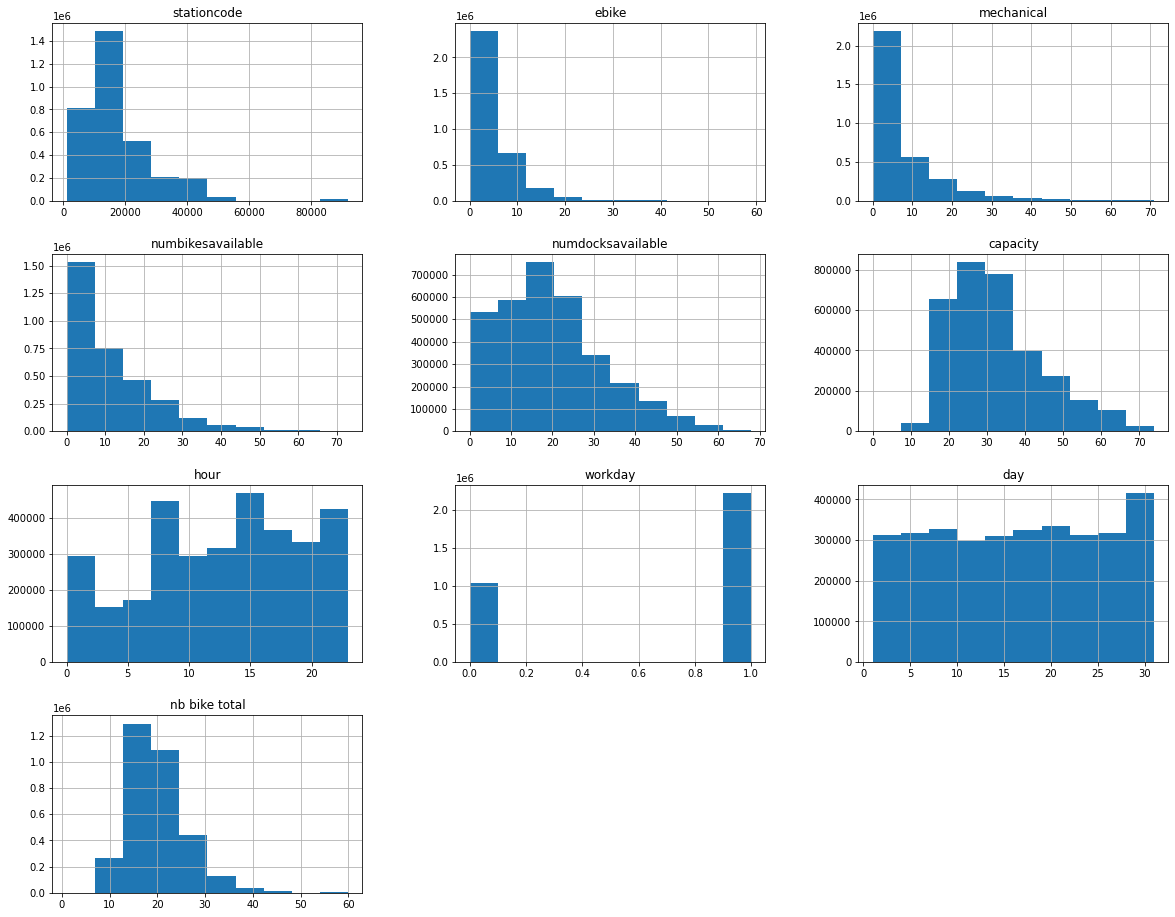

In [27]:
df.hist(figsize=(20,16))
plt.show()

* ebike : la plupart ebike disponible est entre 0 et 5
* mechanical : la plupart mechanical disponible est entre 0 et 6
* numbikesavailable : le nombre de vélos disponibles par station est très souvent entre 0 et 10
* numdocksavailable : le nombre de vélos disponibles par station est souvent entre 0 et 30
* capacity : chaque station a des bornes entre 15 et 36 dans le plus part de cas
* hour : les gens prends les velibs souvent entre 8 et 9H du matin, puis 14H et 16H, puis 21H et 23H (visite soir)
* workday : les gens prends 1 fois plus de vélos les semaines (5 jours) que le weekend (2jour)
* day : c'est assez stable, mais les deux derniers jours du mai il y a beaucoup plus de prêt du vélo


In [17]:
moy_ab = round(df.groupby(['duedate','stationcode'])['numbikesavailable'].mean().mean(),0)
moy_as = round(df.groupby(['duedate','stationcode'])['numdocksavailable'].mean().mean(),0)

print("En moyenne, il y a {0} vélos disponibles par station".format(moy_ab))
print("En moyenne, il y a {0} bornes disponibles par station".format(moy_as))

En moyenne, il y a 11.0 vélos disponibles par station
En moyenne, il y a 19.0 bornes disponibles par station


# analyser le ride-count entre différents jours d'une semaine

In [7]:
ebike = df.groupby('hour')['ebike'].count().reset_index()
ebike

,hour,ebike
0,0,114011
1,1,96564
2,2,84226
3,3,76252
4,4,77221
5,5,74522
6,6,97245
7,7,142772
8,8,159207
9,9,145528


[Text(0.5, 1.0, 'Nombre de borne disponible de différents jours')]

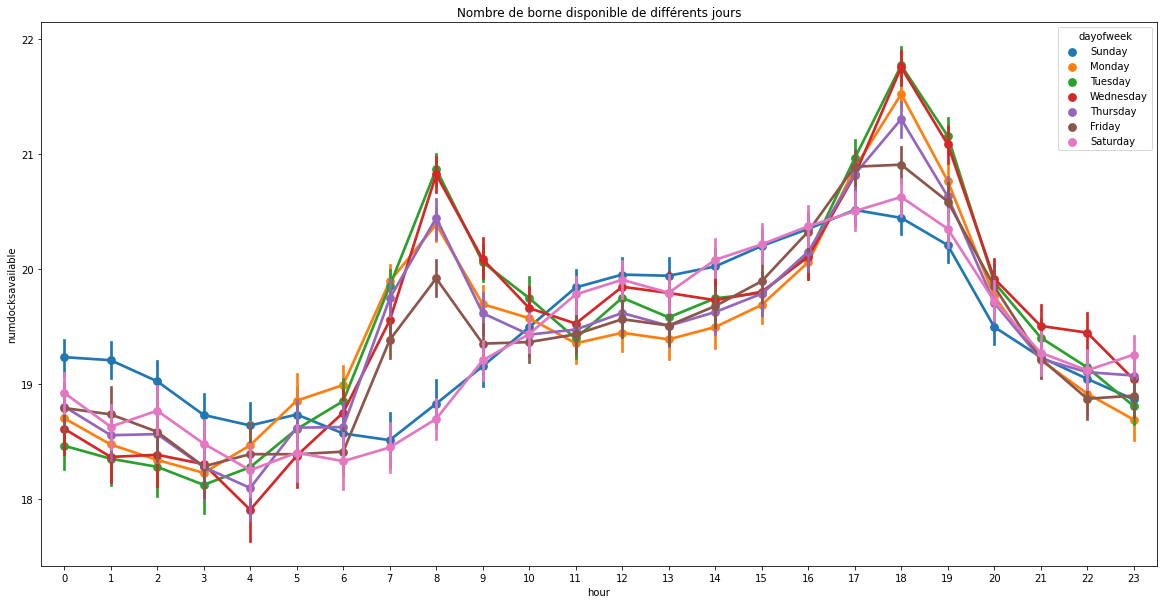

In [8]:

fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='numdocksavailable', hue='dayofweek', ax=ax)
ax.set(title='Nombre de borne disponible de différents jours')

* bornes disponibles = nombre de vélos en utilisation
* dans la semaine, les gens prends des vélos le plus entre 6H et 10H et entre 16H et 20H pour aller travailler et rentrer, plus à 18H
* dans le weekend, les gens prends des vélos plustôt entre 9H et 21H, plus à 18H

[Text(0.5, 1.0, 'Nombre de borne disponible en jour de travail et de non travail')]

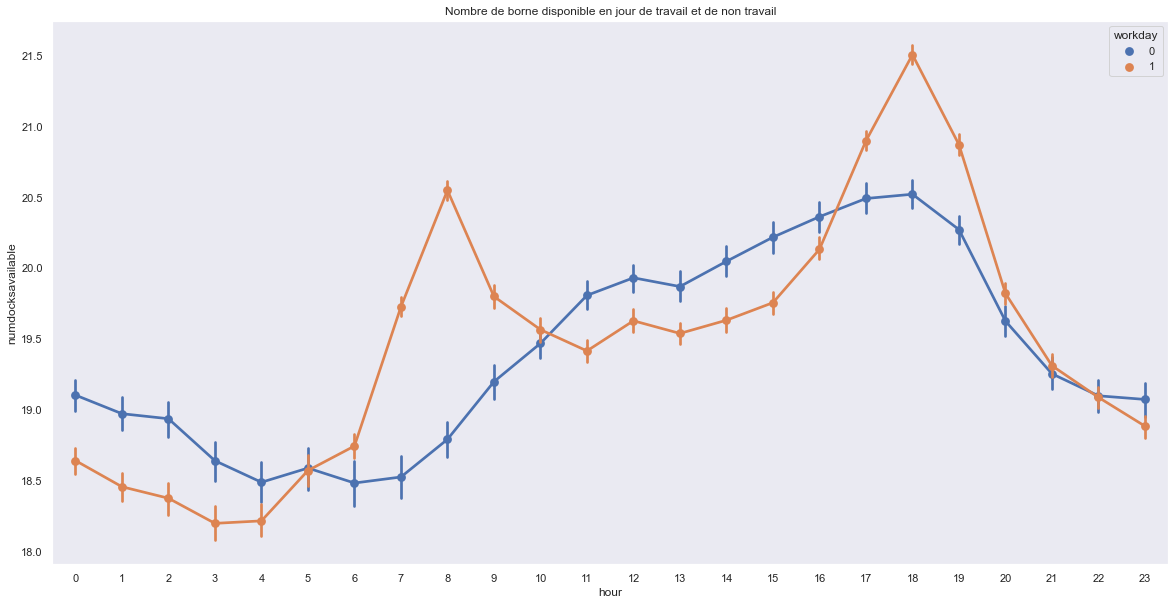

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='numdocksavailable', hue='workday', ax=ax)
ax.set(title='Nombre de borne disponible en jour de travail et de non travail')

In [56]:
ebike = df.groupby('hour')['ebike'].count().reset_index()

[Text(0.5, 1.0, 'Count of ebikes during different hours')]

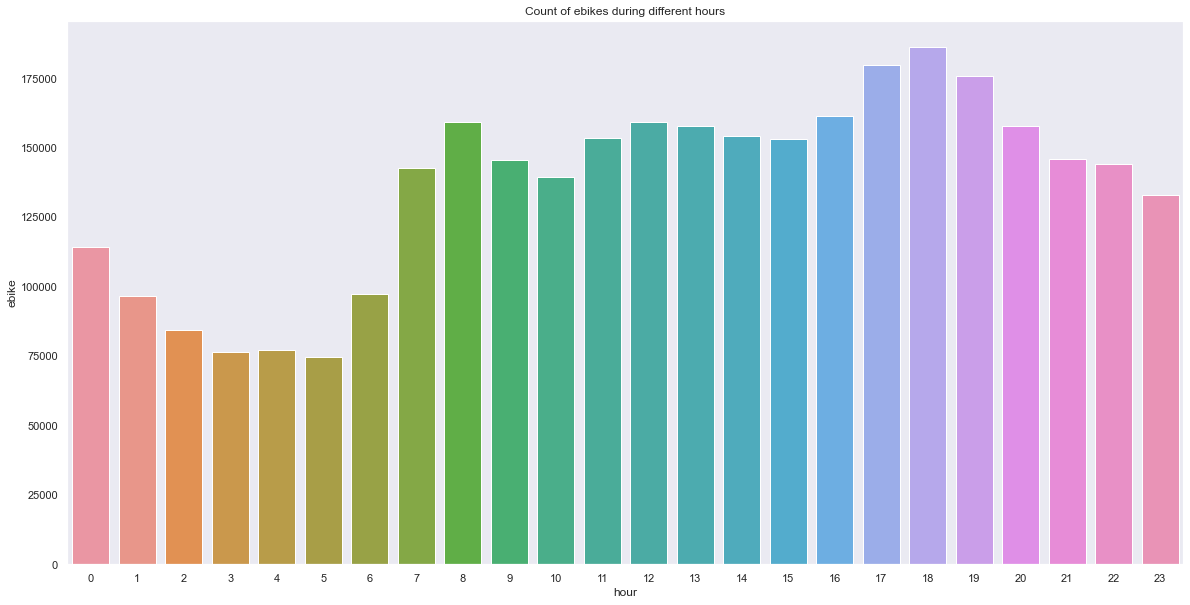

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=ebike, x='hour', y='ebike', ax=ax)
ax.set(title='Count of ebikes during different hours')

* compte de lignes pour chaque heure = pret / rendu du vélo
* le plus fréquant entre 7H et 9H puis entre 16H et 20H

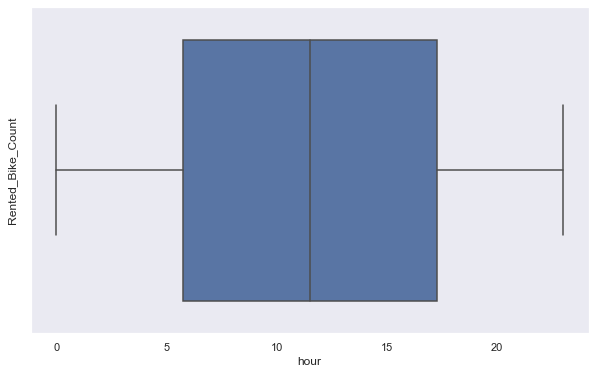

In [98]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=ebike['hour'])
plt.show()

les gens utilisent souvent les vélos entre 6H et 17H

[Text(0.5, 1.0, 'Count of ebikes during different days of a week')]

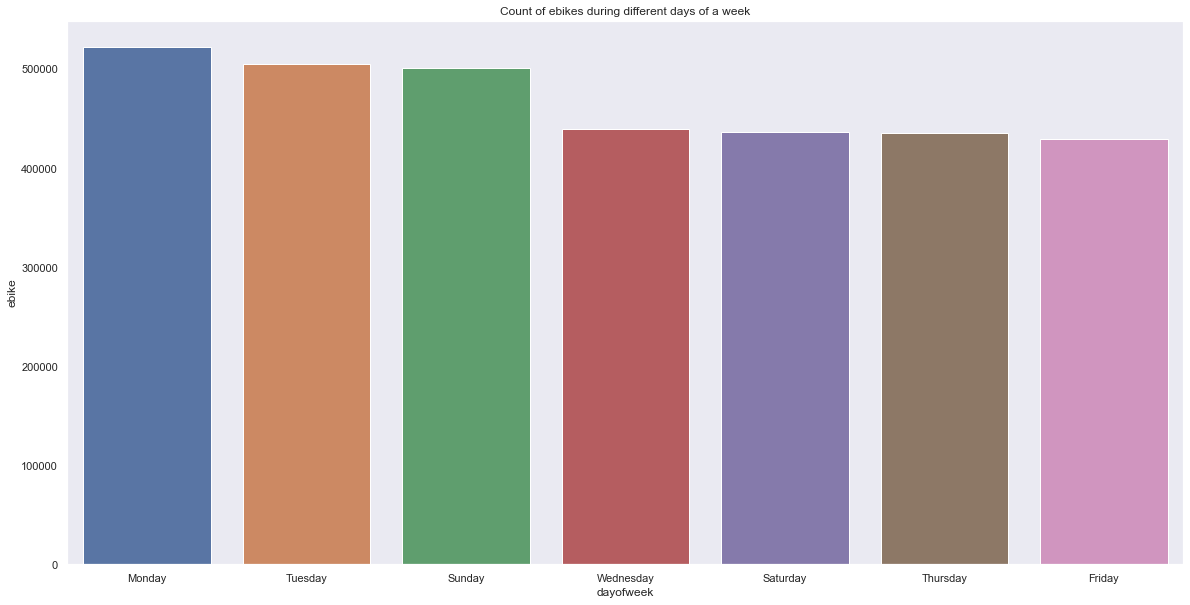

In [64]:
ebike = df.groupby('dayofweek')['ebike'].count().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=ebike, x='dayofweek', y='ebike', ax=ax)
ax.set(title='Count of ebikes during different days of a week')

* les gens utilisent les vélos le plus en lundi, le moins en vendredi

In [87]:
df['workday'].value_counts()

1    2227836
0    1040104
Name: workday, dtype: int64

* 1 - jour de travail en total 2227836 fois d'utilisations du vélo
* 0 - weekend en total 1040104 fois d'utilisations du vélo

In [81]:
ebike = df.groupby('day')['ebike'].count().reset_index()
list_weekends = [1,7, 8, 14,15,21,22,26,28,29]
ebike['workday'] = 1
ebike.loc[ebike['day'].isin(list_weekends), 'workday'] = 0
#ebike = ebike.assign(weekday=lambda x:0 if x['day'].isin(list_weekends) else 1, axis=1 )
ebike

,day,ebike,workday
0,1,104316,0
1,2,102434,1
2,3,106152,1
3,4,108530,1
4,5,108809,1
5,6,99387,1
6,7,109876,0
7,8,108218,0
8,9,108213,1
9,10,75176,1


[Text(0.5, 1.0, 'Count of ebikes during different days')]

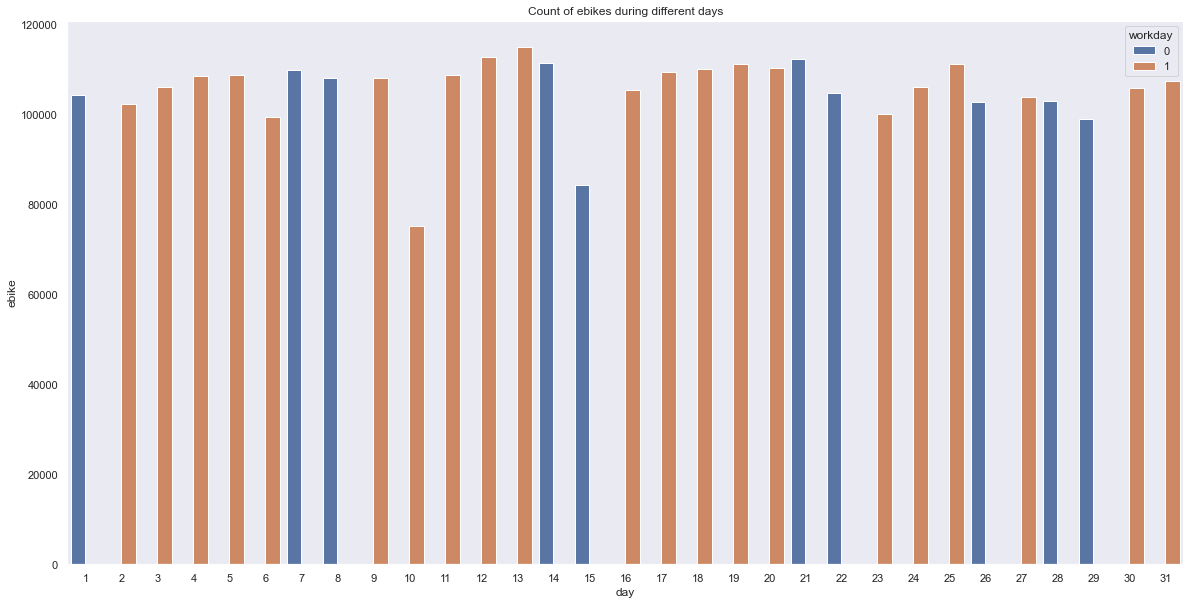

In [82]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=ebike, x='day', y='ebike', hue='workday', ax=ax)
ax.set(title='Count of ride time during different days')

* le 10 et le 15 il y a moins d'utilisation du vélo

<AxesSubplot:>

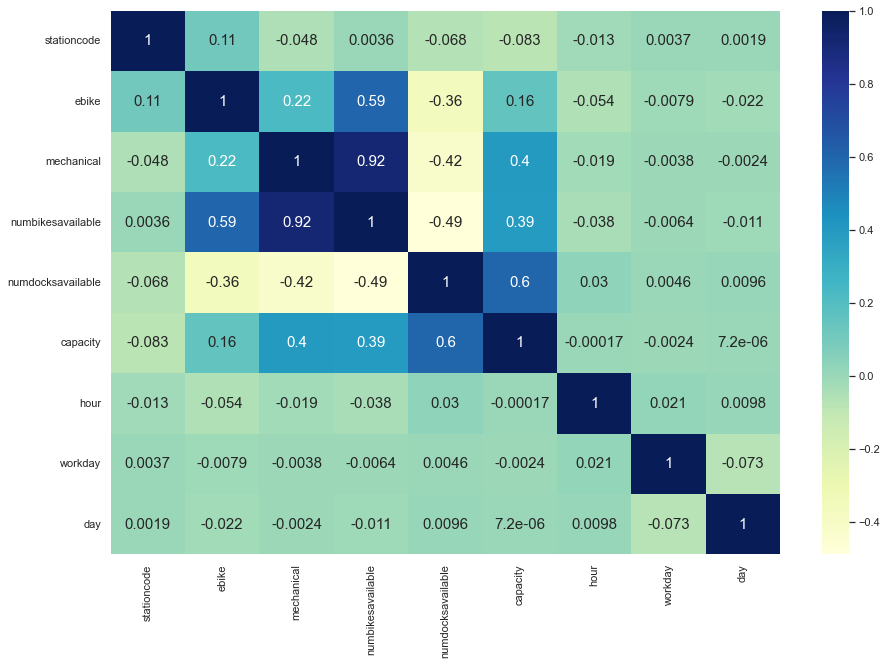

In [84]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15}, cmap="YlGnBu")

# analyser la situation : pas de vélo disponible

In [7]:
df_bike_nonavailable = df.loc[(df['numbikesavailable']==0) & (df['is_installed']=='OUI')]
df_bike_nonavailable

,stationcode,ebike,mechanical,duedate,numbikesavailable,numdocksavailable,capacity,is_renting,is_installed,is_returning,hour,dayofweek,workday,day,nb bike total
2,12109,0,0,2022-05-01T00:40:15+02:00,0,30,30,NON,OUI,NON,0,Sunday,0,1,14
27,14108,0,0,2022-05-01T00:40:05+02:00,0,21,21,OUI,OUI,OUI,0,Sunday,0,1,18
35,20143,0,0,2022-05-01T00:40:56+02:00,0,44,44,NON,OUI,NON,0,Sunday,0,1,28
42,15068,0,0,2022-05-01T00:38:51+02:00,0,15,16,OUI,OUI,OUI,0,Sunday,0,1,13
49,17048,0,0,2022-05-01T00:38:36+02:00,0,29,30,OUI,OUI,OUI,0,Sunday,0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267649,14028,0,0,2022-05-31T14:22:20+02:00,0,46,47,OUI,OUI,OUI,14,Tuesday,1,31,31
3267687,21017,0,0,2022-05-31T23:21:39+02:00,0,56,56,OUI,OUI,OUI,23,Tuesday,1,31,21
3267766,15006,0,0,2022-05-31T23:26:39+02:00,0,37,38,OUI,OUI,OUI,23,Tuesday,1,31,15
3267836,1025,0,0,2022-05-31T23:26:58+02:00,0,16,18,OUI,OUI,OUI,23,Tuesday,1,31,17


In [8]:
df_bike_nonavailable.shape[0]

104197

In [11]:
(df_bike_nonavailable.shape[0] / df.shape[0])*100

3.1884612324583688

taux de vélo indisponible : 3.18%

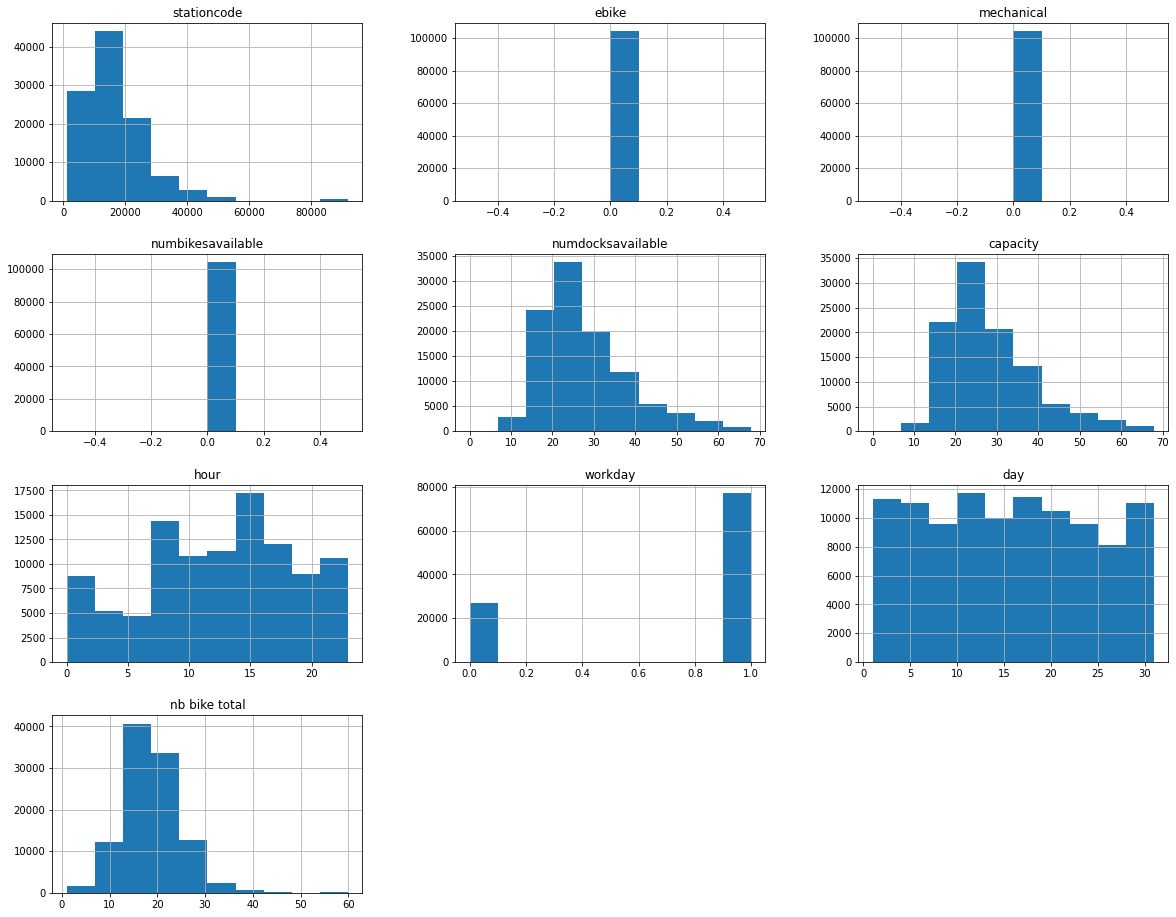

In [12]:
df_bike_nonavailable.hist(figsize=(20,16))
plt.show()

 quand il n'y a pas de vélo, les bornes sont vides (disponibles )  

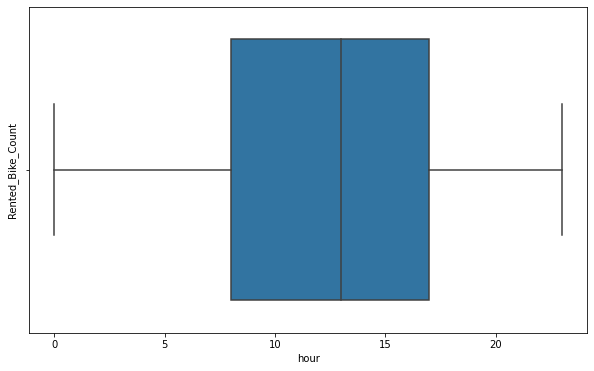

In [34]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df_bike_nonavailable['hour'])
plt.show()

In [42]:
t = df_bike_nonavailable.groupby('duedate')['stationcode'].count().sort_values(ascending=False)
t = t.reset_index()
t

,duedate,stationcode
0,2022-05-18T08:39:58+02:00,7
1,2022-05-18T18:41:26+02:00,7
2,2022-05-10T08:11:36+02:00,7
3,2022-05-16T08:32:55+02:00,7
4,2022-05-17T08:36:22+02:00,7
...,...,...
85080,2022-05-13T14:23:11+02:00,1
85081,2022-05-13T14:23:14+02:00,1
85082,2022-05-13T14:23:17+02:00,1
85083,2022-05-03T20:50:19+02:00,1


<AxesSubplot:>

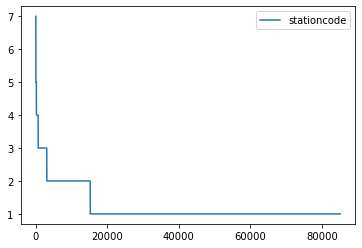

In [44]:
t.plot()

In [43]:
t1 = df_bike_nonavailable.groupby('stationcode')['duedate'].nunique().sort_values(ascending=False)
t1 = t1.reset_index()
t1

,stationcode,duedate
0,10033,851
1,21112,758
2,1015,544
3,14032,489
4,20029,400
...,...,...
1218,21310,1
1219,21307,1
1220,5119,1
1221,26004,1


<AxesSubplot:>

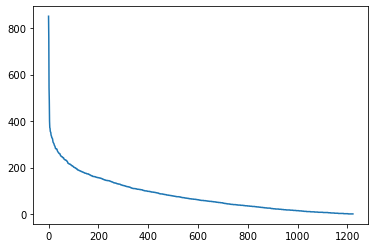

In [46]:
t1['duedate'].plot()

In [77]:
df_bike_nonavailable.loc[df_bike_nonavailable['stationcode']==10033]['numdocksavailable'].unique()

array([24], dtype=int64)

# analyser la situation : pas de borne disponible

In [13]:
df_dock_nonavailable = df.loc[(df['numdocksavailable']==0) & (df['is_installed']=='OUI')]
df_dock_nonavailable

,stationcode,ebike,mechanical,duedate,numbikesavailable,numdocksavailable,capacity,is_renting,is_installed,is_returning,hour,dayofweek,workday,day,nb bike total
110,11047,7,20,2022-05-01T00:40:46+02:00,27,0,30,OUI,OUI,OUI,0,Sunday,0,1,17
121,12111,16,11,2022-05-01T00:40:47+02:00,27,0,27,OUI,OUI,OUI,0,Sunday,0,1,23
132,11113,34,21,2022-05-01T00:39:31+02:00,55,0,58,OUI,OUI,OUI,0,Sunday,0,1,33
135,46002,29,6,2022-05-01T00:37:26+02:00,35,0,35,OUI,OUI,OUI,0,Sunday,0,1,30
188,44003,8,12,2022-05-01T00:40:55+02:00,20,0,20,OUI,OUI,OUI,0,Sunday,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267760,12155,10,33,2022-05-31T23:26:55+02:00,43,0,43,OUI,OUI,OUI,23,Tuesday,1,31,20
3267769,20015,22,12,2022-05-31T23:26:39+02:00,34,0,36,OUI,OUI,OUI,23,Tuesday,1,31,34
3267853,23301,4,23,2022-05-31T23:24:43+02:00,27,0,27,OUI,OUI,OUI,23,Tuesday,1,31,14
3267881,18021,14,7,2022-05-31T23:26:46+02:00,21,0,21,OUI,OUI,OUI,23,Tuesday,1,31,19


In [14]:
df_dock_nonavailable['duedate'].nunique()

42700

In [15]:
(df_dock_nonavailable.shape[0] / df.shape[0]) * 100

1.9113570016585373

taux de borne indisponible : 1.91%

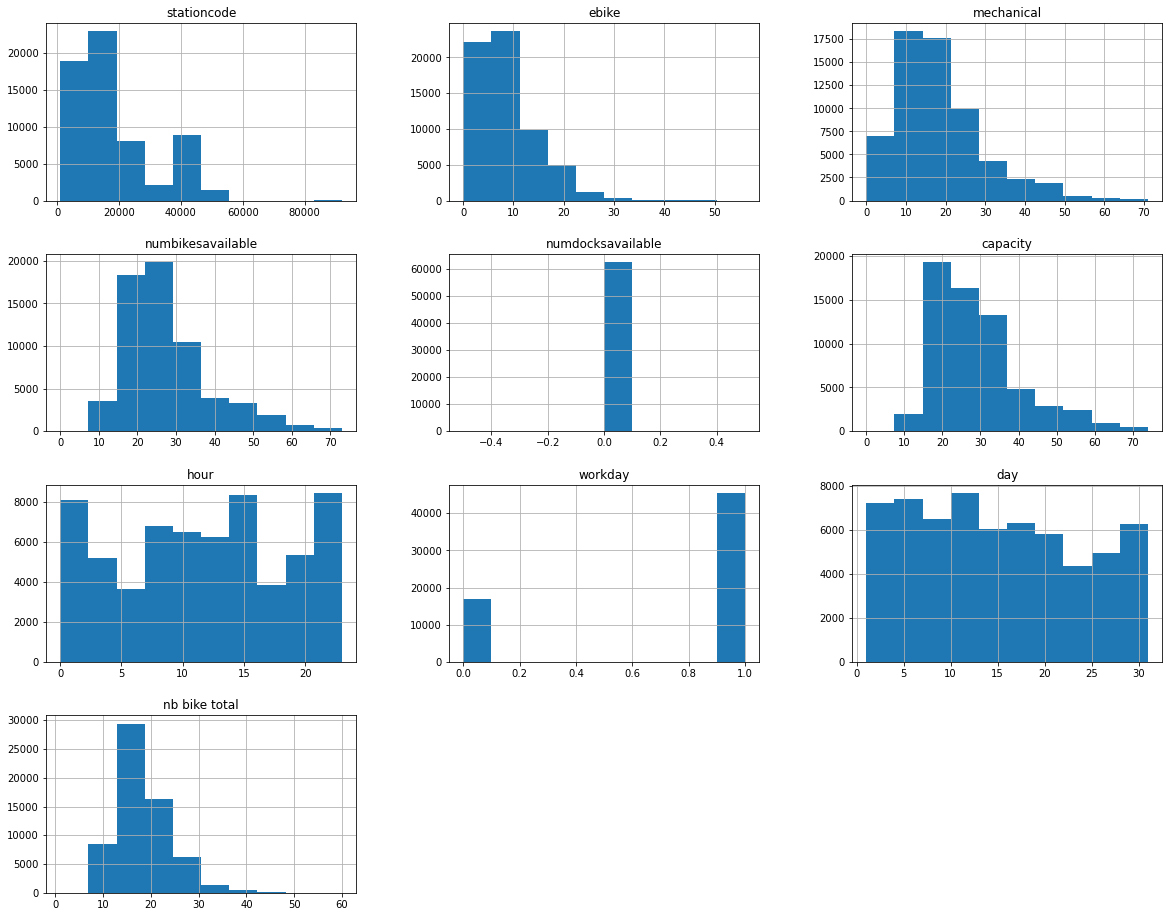

In [16]:
df_dock_nonavailable.hist(figsize=(20,16))
plt.show()

In [17]:
t2 = df_dock_nonavailable.groupby('stationcode')['duedate'].nunique().sort_values(ascending=False)
t2 = t2.reset_index()
t2

,stationcode,duedate
0,42014,333
1,15110,330
2,15067,310
3,15063,308
4,41405,302
...,...,...
935,12155,1
936,10039,1
937,22001,1
938,23004,1


<AxesSubplot:>

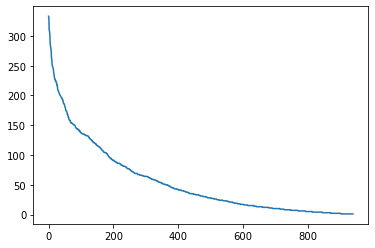

In [18]:
t2['duedate'].plot()

In [19]:
df_dock_nonavailable.loc[df_dock_nonavailable['stationcode']==15110]['numbikesavailable'].unique()

array([23, 22, 21, 24, 20, 19], dtype=int64)

#les bornes de la station ne sont pas disponibles car les vélos ne sont pas pris.
On peut réfléchir: déplacer les vélos vers la station qui manque du vélo (velodisponible==0)

In [20]:
df.head()

,stationcode,ebike,mechanical,duedate,numbikesavailable,numdocksavailable,capacity,is_renting,is_installed,is_returning,hour,dayofweek,workday,day,nb bike total
0,16107,2,1,2022-05-01T00:33:45+02:00,3,31,35,OUI,OUI,OUI,0,Sunday,0,1,16
1,11104,9,4,2022-05-01T00:39:22+02:00,13,5,20,OUI,OUI,OUI,0,Sunday,0,1,12
2,12109,0,0,2022-05-01T00:40:15+02:00,0,30,30,NON,OUI,NON,0,Sunday,0,1,14
3,9020,1,1,2022-05-01T00:38:42+02:00,2,19,21,OUI,OUI,OUI,0,Sunday,0,1,16
4,5001,2,34,2022-05-01T00:40:52+02:00,36,8,45,OUI,OUI,OUI,0,Sunday,0,1,27


# Analyse :
# quelle station ont plus de flux (duedate count plus)

# qui a available taux moins élévé ( calculer les taux available par station)
   * créer deux colonnes : bikeavaible = numbike/ebike, borneavailable/capacity
 

In [30]:
df_s = pd.read_csv('output/stations.csv', sep=",")
df_s

,Unnamed: 0,name,stationcode,nom_arrondissement_communes,latitude,longitude,capacity,ebike
0,0,Benjamin Godard - Victor Hugo,16107,Paris,48.865983,2.275725,35.0,16
1,1,Charonne - Robert et Sonia Delauney,11104,Paris,48.855908,2.392571,20.0,12
2,2,Mairie du 12ème,12109,Paris,48.840855,2.387555,30.0,14
3,3,Toudouze - Clauzel,9020,Paris,48.879296,2.337360,21.0,16
4,4,Harpe - Saint-Germain,5001,Paris,48.851519,2.343670,45.0,27
...,...,...,...,...,...,...,...,...
1415,1415,Martyrs de Châteaubriant - Jean Grandel,51008,Argenteuil,48.951432,2.211214,38.0,3
1416,1416,Bateliers - Quai de Seine,34012,Saint-Ouen-sur-Seine,48.915818,2.323953,26.0,1
1417,1417,Docteur Calmette - Martre,21120,Clichy,48.898969,2.308651,30.0,2
1418,1418,Bourdon - Pont Morland,4006,Paris,48.847810,2.365936,52.0,4


In [39]:
df_nb_flux = df.groupby('stationcode')['duedate'].count().reset_index()
df_nb_flux= df_nb_flux.sort_values(ascending=False, by="duedate")

array([[<AxesSubplot:title={'center':'stationcode'}>,
        <AxesSubplot:title={'center':'duedate'}>]], dtype=object)

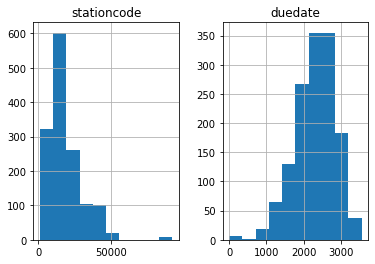

In [40]:
df_nb_flux.hist()

In [41]:
df_nb_flux = df_nb_flux.merge(df_s[['name', 'ebike', 'stationcode']], how='left', on="stationcode")


,stationcode,duedate,name,ebike
0,12151,3552,Gare de Lyon - Place Louis Armand,38
1,11048,3503,Place Mireille Havet,16
2,11001,3493,Richard Lenoir - Place de la Bastille,34
3,11037,3404,Faubourg Du Temple - Republique,25
4,4010,3387,Saint-Antoine Sévigné,20
...,...,...,...,...
1415,4006,65,Bourdon - Pont Morland,4
1416,21120,9,Docteur Calmette - Martre,2
1417,34012,3,Bateliers - Quai de Seine,1
1418,45005,1,Stalingrad - Général de Gaulle,1


In [42]:
df_nb_flux = df_nb_flux.rename(columns={"duedate": "ride_qty", "ebike" : "ebike_qty"})
df_nb_flux

,stationcode,ride_qty,name,ebike_qty
0,12151,3552,Gare de Lyon - Place Louis Armand,38
1,11048,3503,Place Mireille Havet,16
2,11001,3493,Richard Lenoir - Place de la Bastille,34
3,11037,3404,Faubourg Du Temple - Republique,25
4,4010,3387,Saint-Antoine Sévigné,20
...,...,...,...,...
1415,4006,65,Bourdon - Pont Morland,4
1416,21120,9,Docteur Calmette - Martre,2
1417,34012,3,Bateliers - Quai de Seine,1
1418,45005,1,Stalingrad - Général de Gaulle,1


In [43]:
df['taux_velo_dispo'] = df['numbikesavailable'] / df['nb bike total']
df['taux_borne_dispo'] = df['numdocksavailable'] /df['capacity']

In [44]:
df_m = df.merge(df_s[['name','latitude','longitude','stationcode']], how="left", on='stationcode' )
df_m

,stationcode,ebike,mechanical,duedate,numbikesavailable,numdocksavailable,capacity,is_renting,is_installed,is_returning,hour,dayofweek,workday,day,nb bike total,taux_velo_dispo,taux_borne_dispo,name,latitude,longitude
0,16107,2,1,2022-05-01T00:33:45+02:00,3,31,35,OUI,OUI,OUI,0,Sunday,0,1,16,0.187500,0.885714,Benjamin Godard - Victor Hugo,48.865983,2.275725
1,11104,9,4,2022-05-01T00:39:22+02:00,13,5,20,OUI,OUI,OUI,0,Sunday,0,1,12,1.083333,0.250000,Charonne - Robert et Sonia Delauney,48.855908,2.392571
2,12109,0,0,2022-05-01T00:40:15+02:00,0,30,30,NON,OUI,NON,0,Sunday,0,1,14,0.000000,1.000000,Mairie du 12ème,48.840855,2.387555
3,9020,1,1,2022-05-01T00:38:42+02:00,2,19,21,OUI,OUI,OUI,0,Sunday,0,1,16,0.125000,0.904762,Toudouze - Clauzel,48.879296,2.337360
4,5001,2,34,2022-05-01T00:40:52+02:00,36,8,45,OUI,OUI,OUI,0,Sunday,0,1,27,1.333333,0.177778,Harpe - Saint-Germain,48.851519,2.343670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267935,34008,8,17,2022-05-31T23:26:24+02:00,25,3,30,OUI,OUI,OUI,23,Tuesday,1,31,21,1.190476,0.100000,Garibaldi - Gabriel Péri,48.905742,2.331604
3267936,18023,24,9,2022-05-31T23:24:00+02:00,33,2,35,OUI,OUI,OUI,23,Tuesday,1,31,33,1.000000,0.057143,Ordener - Poissonniers,48.891214,2.351289
3267937,8004,3,1,2022-05-31T23:25:58+02:00,4,62,67,OUI,OUI,OUI,23,Tuesday,1,31,38,0.105263,0.925373,Malesherbes - Place de la Madeleine,48.870406,2.323244
3267938,20014,1,4,2022-05-31T23:34:06+02:00,5,30,35,OUI,OUI,OUI,23,Tuesday,1,31,20,0.250000,0.857143,Charonne - Alexandre Dumas,48.856077,2.394869


In [46]:
taux_moyen = df_m.groupby('stationcode').agg({'taux_velo_dispo': 'mean', 'taux_borne_dispo' : 'mean'})
taux_moyen

,taux_velo_dispo,taux_borne_dispo
stationcode,,
1001,0.509023,0.343222
1002,0.578799,0.408915
1003,0.797111,0.404674
1006,0.763510,0.494856
1007,0.623062,0.387587
...,...,...
92004,0.535579,0.701464
92005,0.743439,0.613501
92006,0.339013,0.810441


In [47]:
df_nb_flux = df_nb_flux.merge(taux_moyen, how="left", on="stationcode")
df_nb_flux

,stationcode,ride_qty,name,ebike_qty,taux_velo_dispo,taux_borne_dispo
0,12151,3552,Gare de Lyon - Place Louis Armand,38,0.805728,0.439583
1,11048,3503,Place Mireille Havet,16,1.487671,0.352887
2,11001,3493,Richard Lenoir - Place de la Bastille,34,0.575091,0.582632
3,11037,3404,Faubourg Du Temple - Republique,25,0.475405,0.590397
4,4010,3387,Saint-Antoine Sévigné,20,0.706628,0.320615
...,...,...,...,...,...,...
1415,4006,65,Bourdon - Pont Morland,4,0.715385,0.944970
1416,21120,9,Docteur Calmette - Martre,2,0.111111,0.611111
1417,34012,3,Bateliers - Quai de Seine,1,0.000000,1.000000
1418,45005,1,Stalingrad - Général de Gaulle,1,0.000000,NaN


In [48]:
df_nb_flux.to_csv('output/station_statistic.csv')

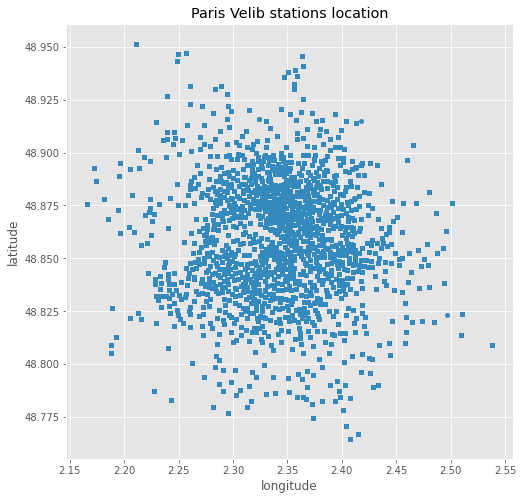

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 8))
df_m.plot(ax = ax, kind='scatter', y='latitude', x='longitude', title='Paris Velib stations location');

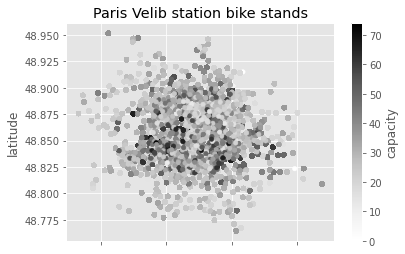

In [85]:
df_m.plot(kind='scatter', y='latitude', x='longitude' , c='capacity', title='Paris Velib station bike stands');

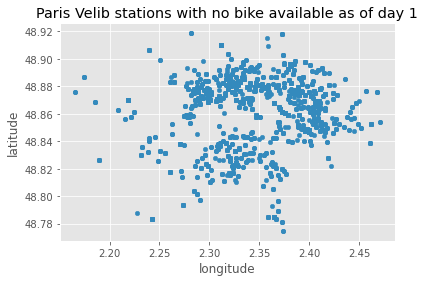

In [90]:
date_str = 1
premierjour = df_m.loc[df_m['day'] == date_str]
premierjour.query("numbikesavailable == 0").plot.scatter(y='latitude', x='longitude',
                                                      title='Paris Velib stations with no bike available as of day '+str(date_str));

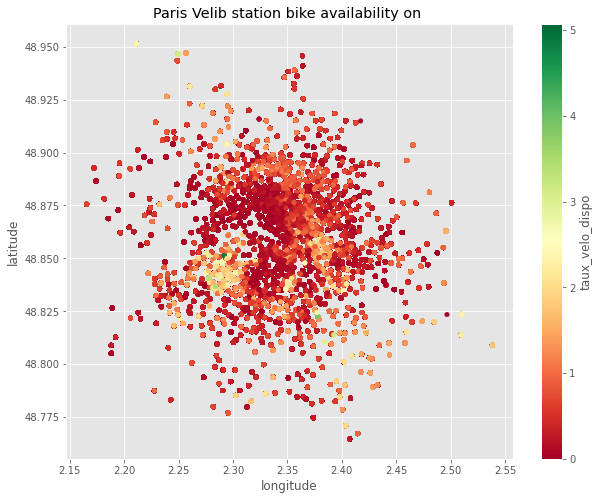

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))

df_m.plot(ax = ax, kind='scatter', y='latitude', x='longitude' , c='taux_velo_dispo', cmap=plt.get_cmap('RdYlGn'));

plt.title('Paris Velib station bike availability on ');

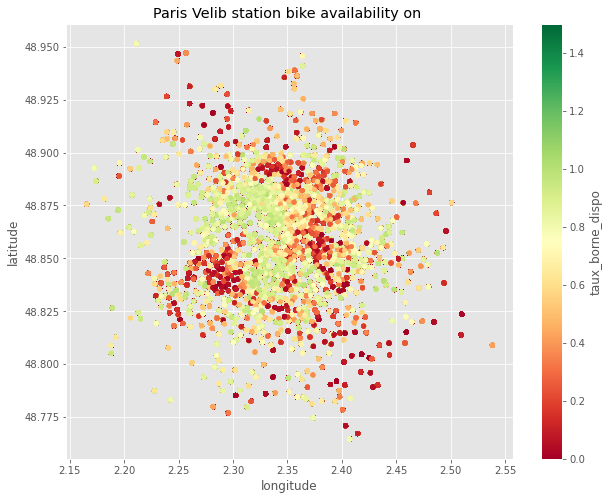

In [92]:
fig, ax = plt.subplots(figsize=(10, 8))

df_m.plot(ax = ax, kind='scatter', y='latitude', x='longitude' , c='taux_borne_dispo', cmap=plt.get_cmap('RdYlGn'));

plt.title('Paris Velib station bike availability on ');

#                                                         LA FIN

# changer les colonnes en catégorie (pas besoin)

In [89]:
#Change the int64 column into catagory column
cols=['hour','day','dayofweek', 'workday']
for col in cols:
    df[col]=df[col].astype('category')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267940 entries, 0 to 3267939
Data columns (total 14 columns):
 #   Column             Dtype   
---  ------             -----   
 0   stationcode        int64   
 1   ebike              int64   
 2   mechanical         int64   
 3   duedate            object  
 4   numbikesavailable  int64   
 5   numdocksavailable  int64   
 6   capacity           int64   
 7   is_renting         object  
 8   is_installed       object  
 9   is_returning       object  
 10  hour               category
 11  dayofweek          category
 12  workday            category
 13  day                category
dtypes: category(4), int64(6), object(4)
memory usage: 261.8+ MB


In [92]:
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['stationcode', 'ebike', 'mechanical', 'numbikesavailable',
       'numdocksavailable', 'capacity'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

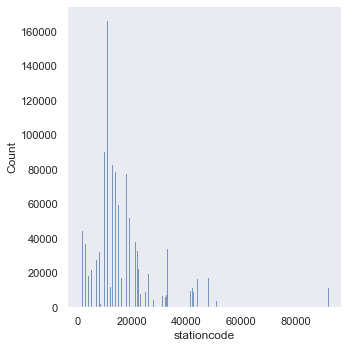

<Figure size 720x432 with 0 Axes>

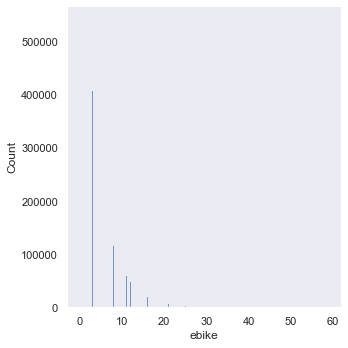

<Figure size 720x432 with 0 Axes>

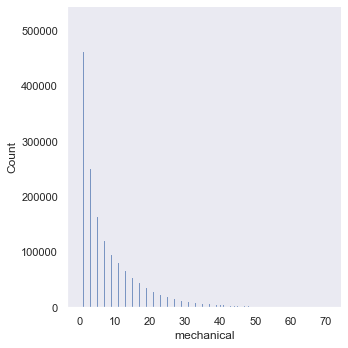

<Figure size 720x432 with 0 Axes>

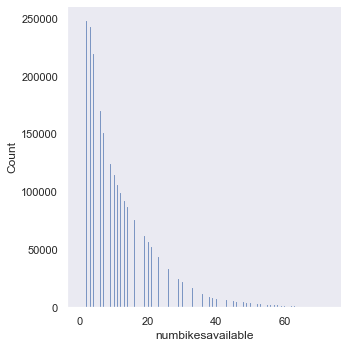

<Figure size 720x432 with 0 Axes>

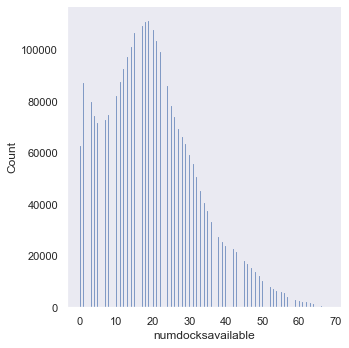

<Figure size 720x432 with 0 Axes>

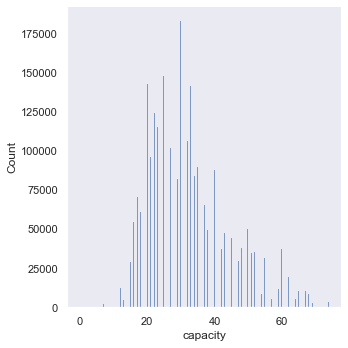

In [94]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.displot(x=df[col])
  plt.xlabel(col)
plt.show()

In [96]:
df

,stationcode,ebike,mechanical,duedate,numbikesavailable,numdocksavailable,capacity,is_renting,is_installed,is_returning,hour,dayofweek,workday,day
0,16107,2,1,2022-05-01T00:33:45+02:00,3,31,35,OUI,OUI,OUI,0,Sunday,0,1
1,11104,9,4,2022-05-01T00:39:22+02:00,13,5,20,OUI,OUI,OUI,0,Sunday,0,1
2,12109,0,0,2022-05-01T00:40:15+02:00,0,30,30,NON,OUI,NON,0,Sunday,0,1
3,9020,1,1,2022-05-01T00:38:42+02:00,2,19,21,OUI,OUI,OUI,0,Sunday,0,1
4,5001,2,34,2022-05-01T00:40:52+02:00,36,8,45,OUI,OUI,OUI,0,Sunday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267935,34008,8,17,2022-05-31T23:26:24+02:00,25,3,30,OUI,OUI,OUI,23,Tuesday,1,31
3267936,18023,24,9,2022-05-31T23:24:00+02:00,33,2,35,OUI,OUI,OUI,23,Tuesday,1,31
3267937,8004,3,1,2022-05-31T23:25:58+02:00,4,62,67,OUI,OUI,OUI,23,Tuesday,1,31
3267938,20014,1,4,2022-05-31T23:34:06+02:00,5,30,35,OUI,OUI,OUI,23,Tuesday,1,31


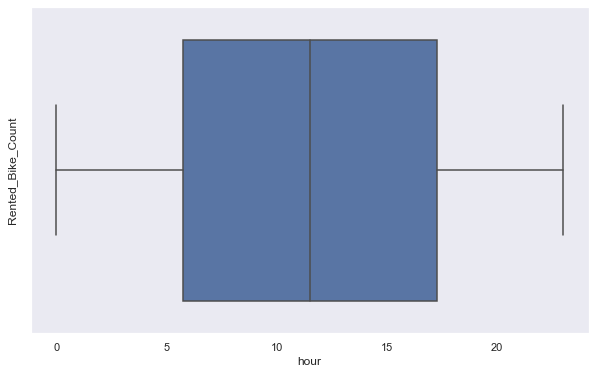